In [1663]:
# Data handling and manipulation library
import pandas as pd

# Library for numerical operations in Python
import numpy as np
import matplotlib.pyplot as plt

In [1664]:
sales_hospital = pd.read_csv('salgs_data_indication_insight_hospital.csv', sep=';')
sales_hospital

,Year Month,Region,Account Description,Product,Size,Size Numeric,Strength,WHO ATC 5 Code,Volume,Value
0,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,19,"160820,1"
1,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2096,"9236652,8"
2,201001,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,23,"622716,26"
3,201002,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,11,"88919,05"
4,201002,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2036,"8972244,8"
...,...,...,...,...,...,...,...,...,...,...
4782,201310,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,472,"2028009,36"
4783,201311,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,45,"354665,7"
4784,201311,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,410,"1761618,3"
4785,201312,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,52,"409835,92"


In [1665]:
sales_hospital['Year Month'].unique()

array([201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
       201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
       201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
      

In [1666]:
# We start by making the column into a string to make it easier to slice
sales_hospital['Year Month'] = sales_hospital['Year Month'].astype(str)

# We then slice the year from the first 4 digits
sales_hospital['Year'] = sales_hospital['Year Month'].str[:4]  
# We then slice the year from the 4th digit to the 6th digit
sales_hospital['Month'] = sales_hospital['Year Month'].str[4:6]

#We delete the column 'Year Month'. 
sales_hospital = sales_hospital.drop(["Year Month"], axis=1)

In [1667]:
#We want to match ATC-code with substance.
substances = pd.read_csv('substancesOfInterest.csv', sep=';')
substances.head()

,ATC5,SKS,Substance,Medicinkode
0,L04AB02,BOHJ18A1,Infliximab,ML04AB02
1,L04AB05,BOHJ18A5,Certolizumab,ML04AB05
2,L04AC05,BOHJ18B3,Ustekinumab,ML04AC05


In [1668]:
#Then merge!
sales_substances = pd.merge(sales_hospital, substances, left_on=['WHO ATC 5 Code'], right_on=['ATC5']) 
sales_substances

,Region,Account Description,Product,Size,Size Numeric,Strength,WHO ATC 5 Code,Volume,Value,Year,Month,ATC5,SKS,Substance,Medicinkode
0,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,19,"160820,1",2010,01,L04AB05,BOHJ18A5,Certolizumab,ML04AB05
1,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2096,"9236652,8",2010,01,L04AB02,BOHJ18A1,Infliximab,ML04AB02
2,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,23,"622716,26",2010,01,L04AC05,BOHJ18B3,Ustekinumab,ML04AC05
3,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,11,"88919,05",2010,02,L04AB05,BOHJ18A5,Certolizumab,ML04AB05
4,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2036,"8972244,8",2010,02,L04AB02,BOHJ18A1,Infliximab,ML04AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,472,"2028009,36",2013,10,L04AB02,BOHJ18A1,Infliximab,ML04AB02
4783,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,45,"354665,7",2013,11,L04AB05,BOHJ18A5,Certolizumab,ML04AB05
4784,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,410,"1761618,3",2013,11,L04AB02,BOHJ18A1,Infliximab,ML04AB02
4785,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,52,"409835,92",2013,12,L04AB05,BOHJ18A5,Certolizumab,ML04AB05


In [1669]:
#We want to drop some of the same column
sales_substances = sales_substances.drop(['ATC5', 'Medicinkode', 'SKS'], axis=1)
sales_substances


,Region,Account Description,Product,Size,Size Numeric,Strength,WHO ATC 5 Code,Volume,Value,Year,Month,Substance
0,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,19,"160820,1",2010,01,Certolizumab
1,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2096,"9236652,8",2010,01,Infliximab
2,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Stelara,1 stk,1,"45 mg/0,5 ml",L04AC05,23,"622716,26",2010,01,Ustekinumab
3,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Cimzia,2 stk.,2,200 mg,L04AB05,11,"88919,05",2010,02,Certolizumab
4,Hovedstaden,"4060 Centralapoteket, Region Hovedstaden",Remicade,1 htgl. a 100 mg,100,100 mg,L04AB02,2036,"8972244,8",2010,02,Infliximab
...,...,...,...,...,...,...,...,...,...,...,...,...
4782,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,472,"2028009,36",2013,10,Infliximab
4783,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,45,"354665,7",2013,11,Certolizumab
4784,Midtjylland,"4398 Viborg Sygehus, apoteket",Remicade,1 htgl.,1,100 mg,L04AB02,410,"1761618,3",2013,11,Infliximab
4785,Midtjylland,"4398 Viborg Sygehus, apoteket",Cimzia,2 stk.,2,200 mg,L04AB05,52,"409835,92",2013,12,Certolizumab


In [1670]:
# We start by making the column into a string to make it easier to slice
sales_substances['Size'] = sales_substances['Size'].astype(str)

# We then slice the year from the first 4 digits
sales_substances['Size_Amount'] = sales_substances['Size'].str[:1]  
# We then slice the year from the 4th digit to the 6th digit
sales_substances['Size_Unit'] = sales_substances['Size'].str[1:]

#We delete the column 'Year Month'. 
cleaned_hosp_sales_size = sales_substances.drop(["Size"], axis=1)


In [1671]:
# We start by making the column into a string to make it easier to slice
cleaned_hosp_sales_size['Account Description'] = cleaned_hosp_sales_size['Account Description'].astype(str)

# We then slice the year from the first 4 digits
cleaned_hosp_sales_size['DLIMI'] = cleaned_hosp_sales_size['Account Description'].str[:4]  
# We then slice the year from the 4th digit to the 6th digit
cleaned_hosp_sales_size['Purchaser'] = cleaned_hosp_sales_size['Account Description'].str[4:]

#We delete the column 'Year Month'. 
cleaned_hosp_sales_size = cleaned_hosp_sales_size.drop(["Account Description"], axis=1)
cleaned_hosp_sales_size = cleaned_hosp_sales_size[['Region', 'DLIMI','Purchaser', 'Product', 'Size Numeric', 'Size_Amount','Size_Unit','Strength','WHO ATC 5 Code', 'Substance', 'Volume','Value','Year','Month']]
cleaned_hosp_sales_size


,Region,DLIMI,Purchaser,Product,Size Numeric,Size_Amount,Size_Unit,Strength,WHO ATC 5 Code,Substance,Volume,Value,Year,Month
0,Hovedstaden,4060,"Centralapoteket, Region Hovedstaden",Cimzia,2,2,stk.,200 mg,L04AB05,Certolizumab,19,"160820,1",2010,01
1,Hovedstaden,4060,"Centralapoteket, Region Hovedstaden",Remicade,100,1,htgl. a 100 mg,100 mg,L04AB02,Infliximab,2096,"9236652,8",2010,01
2,Hovedstaden,4060,"Centralapoteket, Region Hovedstaden",Stelara,1,1,stk,"45 mg/0,5 ml",L04AC05,Ustekinumab,23,"622716,26",2010,01
3,Hovedstaden,4060,"Centralapoteket, Region Hovedstaden",Cimzia,2,2,stk.,200 mg,L04AB05,Certolizumab,11,"88919,05",2010,02
4,Hovedstaden,4060,"Centralapoteket, Region Hovedstaden",Remicade,100,1,htgl. a 100 mg,100 mg,L04AB02,Infliximab,2036,"8972244,8",2010,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,Midtjylland,4398,"Viborg Sygehus, apoteket",Remicade,1,1,htgl.,100 mg,L04AB02,Infliximab,472,"2028009,36",2013,10
4783,Midtjylland,4398,"Viborg Sygehus, apoteket",Cimzia,2,2,stk.,200 mg,L04AB05,Certolizumab,45,"354665,7",2013,11
4784,Midtjylland,4398,"Viborg Sygehus, apoteket",Remicade,1,1,htgl.,100 mg,L04AB02,Infliximab,410,"1761618,3",2013,11
4785,Midtjylland,4398,"Viborg Sygehus, apoteket",Cimzia,2,2,stk.,200 mg,L04AB05,Certolizumab,52,"409835,92",2013,12


In [1672]:
print(cleaned_hosp_sales_size.Product.value_counts(), "\n")
print(cleaned_hosp_sales_size['Region'].value_counts(), "\n")
print(cleaned_hosp_sales_size['WHO ATC 5 Code'].value_counts())

Product
Stelara      1421
Remicade     1361
Cimzia       1224
Remsima       411
Inflectra     197
Zessly        173
Name: count, dtype: int64 

Region
Syddanmark     1834
Sjælland       1139
Midtjylland     750
Hovedstaden     653
Nordjylland     411
Name: count, dtype: int64 

WHO ATC 5 Code
L04AB02    2142
L04AC05    1421
L04AB05    1224
Name: count, dtype: int64


In [1673]:
cleaned_hosp_sales_size.to_csv('sales_data')


In [1674]:
#cleaned_hosp_sales_size = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == 'Infliximab']
cleaned_hosp_sales_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          4787 non-null   object
 1   DLIMI           4787 non-null   object
 2   Purchaser       4787 non-null   object
 3   Product         4787 non-null   object
 4   Size Numeric    4787 non-null   int64 
 5   Size_Amount     4787 non-null   object
 6   Size_Unit       4787 non-null   object
 7   Strength        4787 non-null   object
 8   WHO ATC 5 Code  4787 non-null   object
 9   Substance       4787 non-null   object
 10  Volume          4787 non-null   int64 
 11  Value           4787 non-null   object
 12  Year            4787 non-null   object
 13  Month           4787 non-null   object
dtypes: int64(2), object(12)
memory usage: 523.7+ KB


In [1675]:
""" 
substance_1 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Infliximab"]
substance_2 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Certolizumab"]
substance_3 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Ustekinumab"]

plt.plot(cleaned_hosp_sales_size['Year'], cleaned_hosp_sales_size['Volume'], marker='o', label=substance_1)
#plt.plot(cleaned_hosp_sales_size['Year'], cleaned_hosp_sales_size['Volume'], marker='o', label=substance_2)
#plt.plot(cleaned_hosp_sales_size['Year'], cleaned_hosp_sales_size['Volume'], marker='o', label=substance_3)

plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Sales Volume of Infliximab, Certolizumab, and Ustekinumab Over the Years')
plt.show()  """

' \nsubstance_1 = cleaned_hosp_sales_size[cleaned_hosp_sales_size[\'Substance\'] == "Infliximab"]\nsubstance_2 = cleaned_hosp_sales_size[cleaned_hosp_sales_size[\'Substance\'] == "Certolizumab"]\nsubstance_3 = cleaned_hosp_sales_size[cleaned_hosp_sales_size[\'Substance\'] == "Ustekinumab"]\n\nplt.plot(cleaned_hosp_sales_size[\'Year\'], cleaned_hosp_sales_size[\'Volume\'], marker=\'o\', label=substance_1)\n#plt.plot(cleaned_hosp_sales_size[\'Year\'], cleaned_hosp_sales_size[\'Volume\'], marker=\'o\', label=substance_2)\n#plt.plot(cleaned_hosp_sales_size[\'Year\'], cleaned_hosp_sales_size[\'Volume\'], marker=\'o\', label=substance_3)\n\nplt.grid(True)\nplt.legend()\nplt.xlabel(\'Year\')\nplt.ylabel(\'Volume\')\nplt.title(\'Sales Volume of Infliximab, Certolizumab, and Ustekinumab Over the Years\')\nplt.show()  '

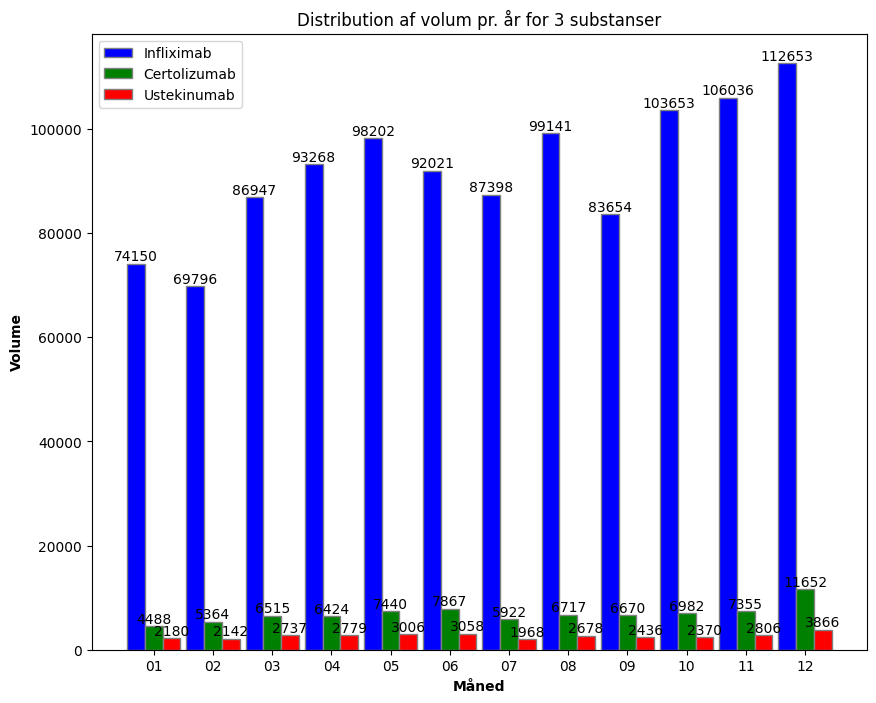

In [1676]:
# Bredde på søjlerne
plt.figure(figsize=(10,8))
barWidth = 0.30

# Position på x-aksen for hver søjle
substance_1 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Infliximab"].groupby('Month')['Volume'].sum()
substance_2 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Certolizumab"].groupby('Month')['Volume'].sum()
substance_3 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Ustekinumab"].groupby('Month')['Volume'].sum()

months = substance_1.index  # Assuming 'Month' is categorical and sorted
r1 = np.arange(len(months))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Opret søjlediagram
bars1 = plt.bar(r1, substance_1, color='b', width=barWidth, edgecolor='grey', label='Infliximab')
bars2 = plt.bar(r2, substance_2, color='g', width=barWidth, edgecolor='grey', label='Certolizumab')
bars3 = plt.bar(r3, substance_3, color='r', width=barWidth, edgecolor='grey', label='Ustekinumab')

# Tilføj labels og titel
plt.xlabel('Måned', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(months))], months)  # Use months from the grouped data
plt.ylabel('Volume', fontweight='bold')
plt.title('Distribution af volum pr. år for 3 substanser')

# Tilføj en legend
plt.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()

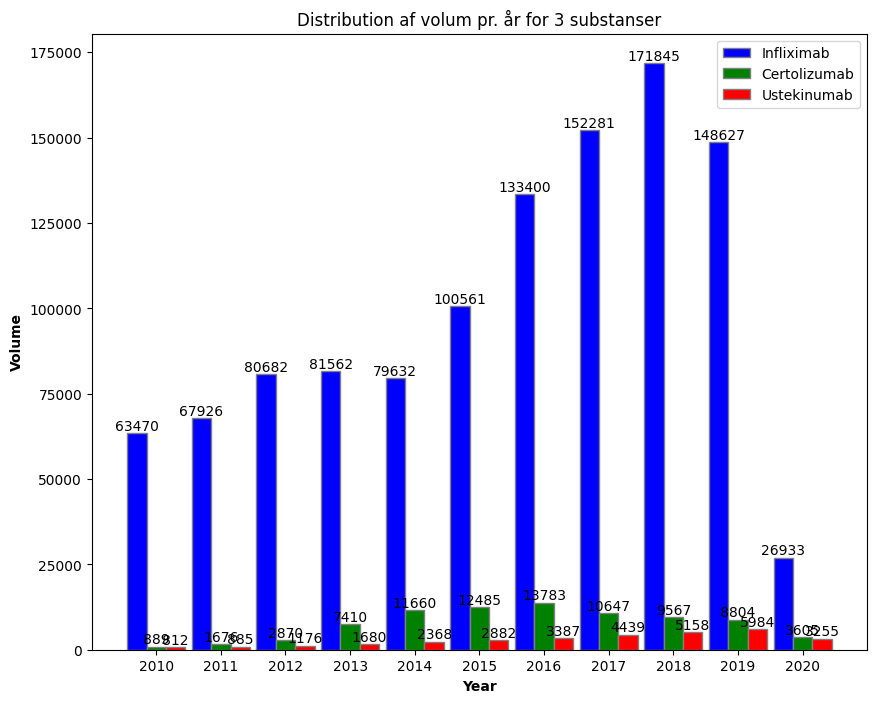

In [1677]:
# Bredde på søjlerne
plt.figure(figsize=(10,8))
barWidth = 0.30

# Position på x-aksen for hver søjle
substance_1 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Infliximab"].groupby('Year')['Volume'].sum()
substance_2 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Certolizumab"].groupby('Year')['Volume'].sum()
substance_3 = cleaned_hosp_sales_size[cleaned_hosp_sales_size['Substance'] == "Ustekinumab"].groupby('Year')['Volume'].sum()

months = substance_1.index  # Assuming 'Year' is categorical and sorted
r1 = np.arange(len(months))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Opret søjlediagram
bars1 = plt.bar(r1, substance_1, color='b', width=barWidth, edgecolor='grey', label='Infliximab')
bars2 = plt.bar(r2, substance_2, color='g', width=barWidth, edgecolor='grey', label='Certolizumab')
bars3 = plt.bar(r3, substance_3, color='r', width=barWidth, edgecolor='grey', label='Ustekinumab')

# Tilføj labels og titel
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(months))], months)  # Use months from the grouped data
plt.ylabel('Volume', fontweight='bold')
plt.title('Distribution af volum pr. år for 3 substanser')

# Tilføj en legend
plt.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()

In [1678]:
import seaborn as sns

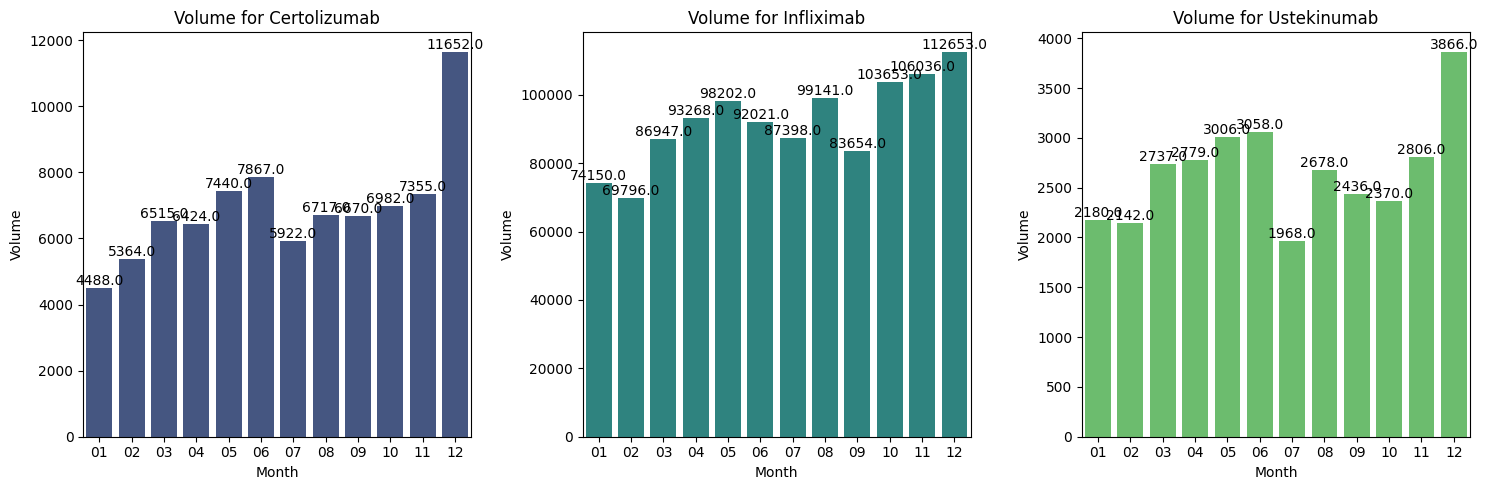

In [1679]:
grouped_data = cleaned_hosp_sales_size.groupby(['Substance', 'Month'])['Volume'].sum().reset_index()

# Get the unique substances for plotting
unique_substance = cleaned_hosp_sales_size['Substance'].unique()
palette = sns.color_palette("viridis", len(unique_substance))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each unique substance and plot the sum of Volume over the months
for i, substance in enumerate(unique_substance):
    ax = axes[i]
    
    # Filter the grouped data for the current substance
    substance_df = grouped_data[grouped_data['Substance'] == substance]
    
    # Plot the sum of Volume for the current substance
    bars = sns.barplot(data=substance_df, x="Month", y="Volume", color=palette[i], ax=ax)
    
    # Add labels to each bar
    for bar in bars.patches:  # `bars.patches` gives you the bar objects
        yval = bar.get_height()  # Get the height of each bar (the 'Volume')
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
                ha='center', va='bottom', color='black')
    
    # Set the title for each plot
    ax.set_title(f"Volume for {substance}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

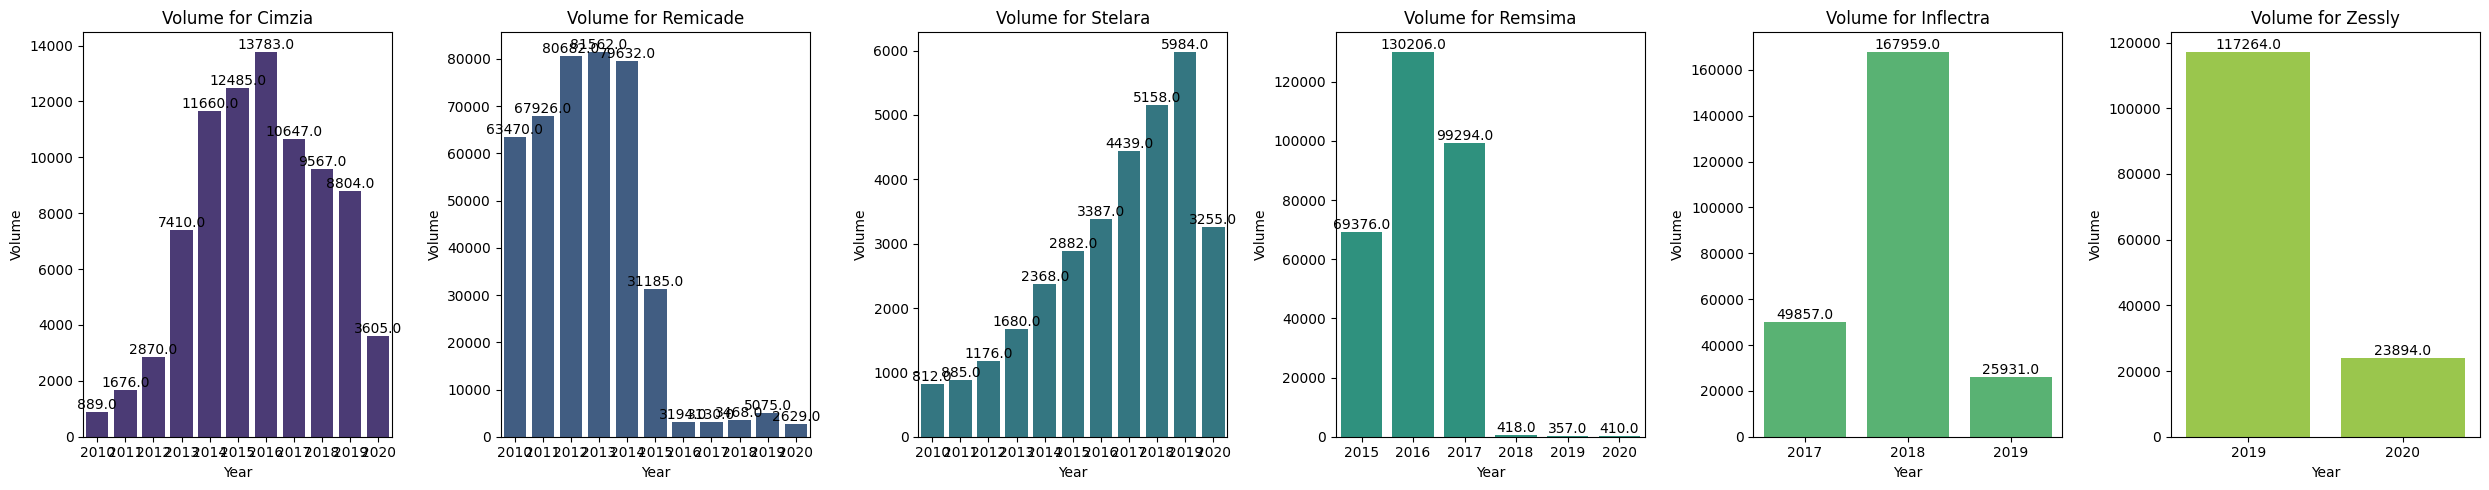

In [1680]:
grouped_data = cleaned_hosp_sales_size.groupby(['Product', 'Year'])['Volume'].sum().reset_index()

# Get the unique substances for plotting
unique_product = cleaned_hosp_sales_size['Product'].unique()
palette = sns.color_palette("viridis", len(unique_product))

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

# Loop through each unique substance and plot the sum of Volume over the months
for i, product in enumerate(unique_product):
    ax = axes[i]
    
    # Filter the grouped data for the current substance
    product_df = grouped_data[grouped_data['Product'] == product]
    
    # Plot the sum of Volume for the current substance
    bars = sns.barplot(data=product_df, x="Year", y="Volume", color=palette[i], ax=ax)
    
    # Add labels to each bar
    for bar in bars.patches:  # `bars.patches` gives you the bar objects
        yval = bar.get_height()  # Get the height of each bar (the 'Volume')
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
                ha='center', va='bottom', color='black')
    
    # Set the title for each plot
    ax.set_title(f"Volume for {product}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

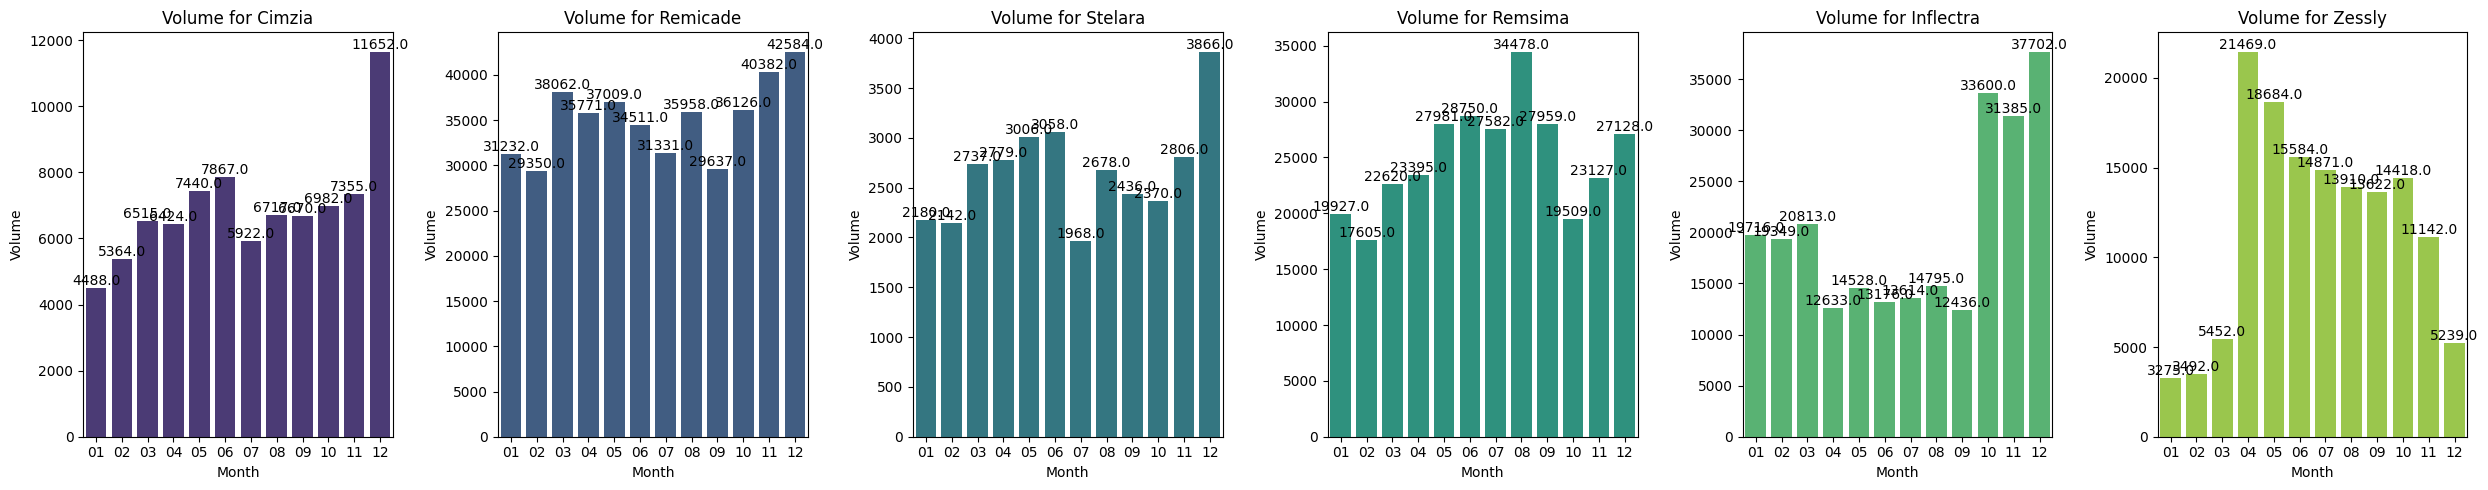

In [1681]:
grouped_data = cleaned_hosp_sales_size.groupby(['Product', 'Month'])['Volume'].sum().reset_index()

# Get the unique substances for plotting
unique_product = cleaned_hosp_sales_size['Product'].unique()
palette = sns.color_palette("viridis", len(unique_product))

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

# Loop through each unique substance and plot the sum of Volume over the months
for i, product in enumerate(unique_product):
    ax = axes[i]
    
    # Filter the grouped data for the current substance
    product_df = grouped_data[grouped_data['Product'] == product]
    
    # Plot the sum of Volume for the current substance
    bars = sns.barplot(data=product_df, x="Month", y="Volume", color=palette[i], ax=ax)
    
    # Add labels to each bar
    for bar in bars.patches:  # `bars.patches` gives you the bar objects
        yval = bar.get_height()  # Get the height of each bar (the 'Volume')
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
                ha='center', va='bottom', color='black')
    
    # Set the title for each plot
    ax.set_title(f"Volume for {product}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [1682]:
# Assuming the DataFrame has columns: 'Product', 'Substance', 'Year', 'Month', and 'Volume'

# Grouping by Product, Substance, Year, and Month
df_grouped = cleaned_hosp_sales_size.groupby(['Substance', 'Year', 'Month']).agg({'Volume': 'sum'}).reset_index()

# Convert Year and Month to a DateTime object
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(Day=1))

# Sorting the data for better visualization
df_grouped.sort_values(by='Date', inplace=True)

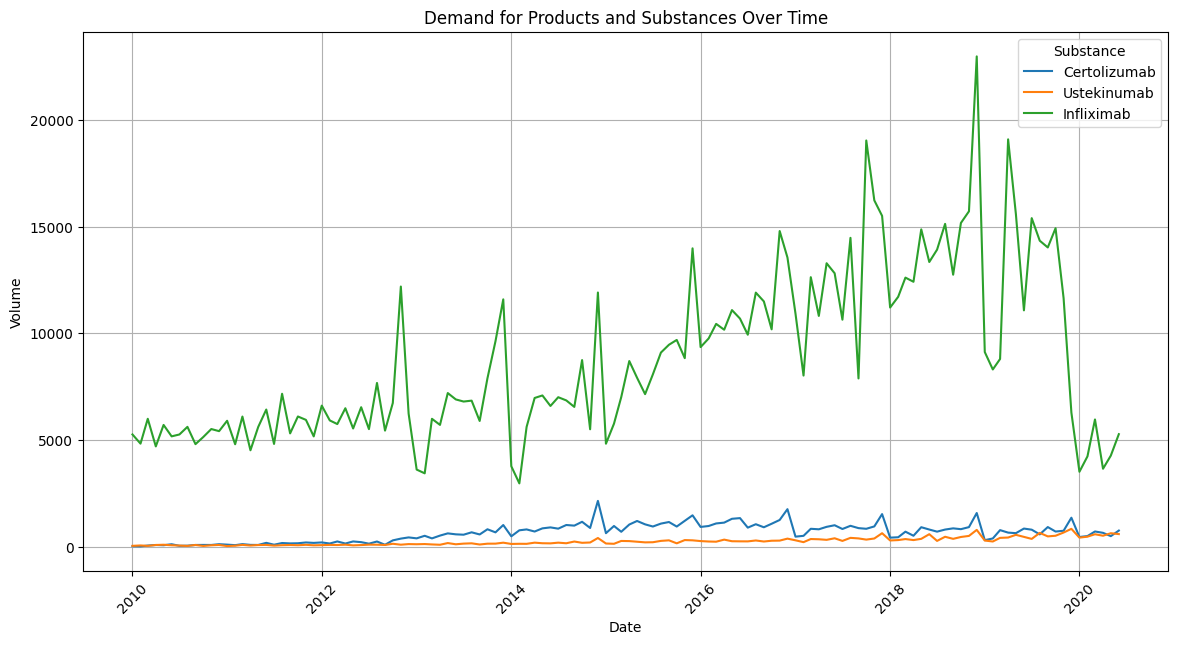

In [1683]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='Date', y='Volume', hue='Substance')
plt.title('Demand for Products and Substances Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

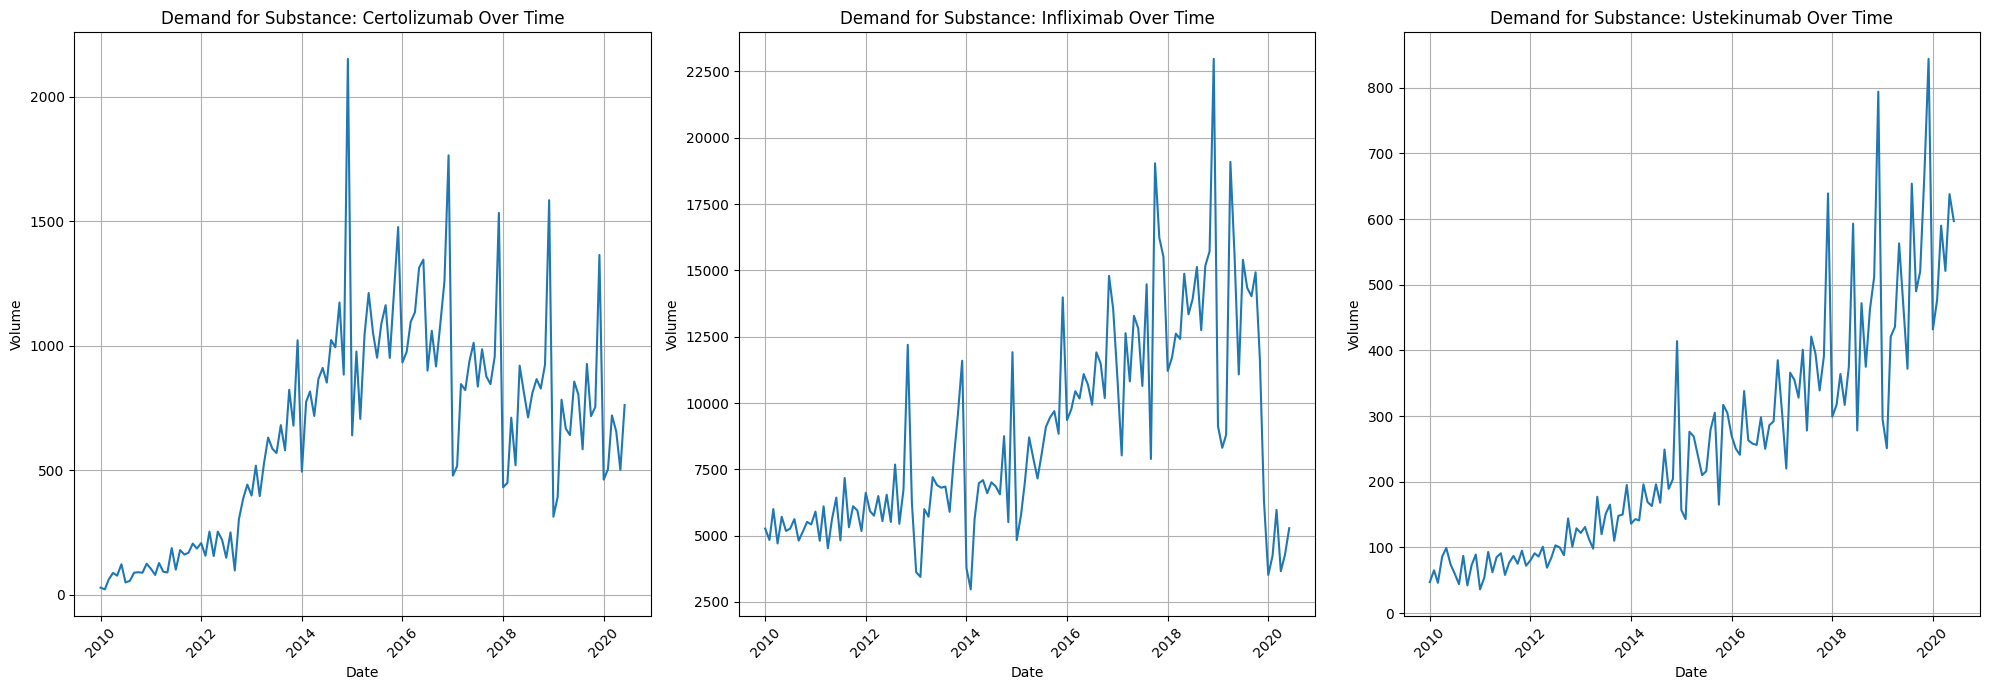

In [1684]:
# Get the unique substances in your DataFrame
substances = cleaned_hosp_sales_size['Substance'].unique()

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, len(substances), figsize=(20, 7))

# Loop through each substance and corresponding axis
for i, substance in enumerate(substances):
    
    # Filter data for the current substance
    df_substance = df_grouped[df_grouped['Substance'] == substance]
    
    # Plot the data for the current substance on the corresponding axis
    sns.lineplot(data=df_substance, x='Date', y='Volume', ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Demand for Substance: {substance} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volume')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

In [1685]:
# Assuming the DataFrame has columns: 'Product', 'Substance', 'Year', 'Month', and 'Volume'

# Grouping by Product, Substance, Year, and Month
df_grouped = cleaned_hosp_sales_size.groupby(['Product',  'Year', 'Month']).agg({'Volume': 'sum'}).reset_index()

# Convert Year and Month to a DateTime object
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(Day=1))

# Sorting the data for better visualization
df_grouped.sort_values(by='Date', inplace=True)

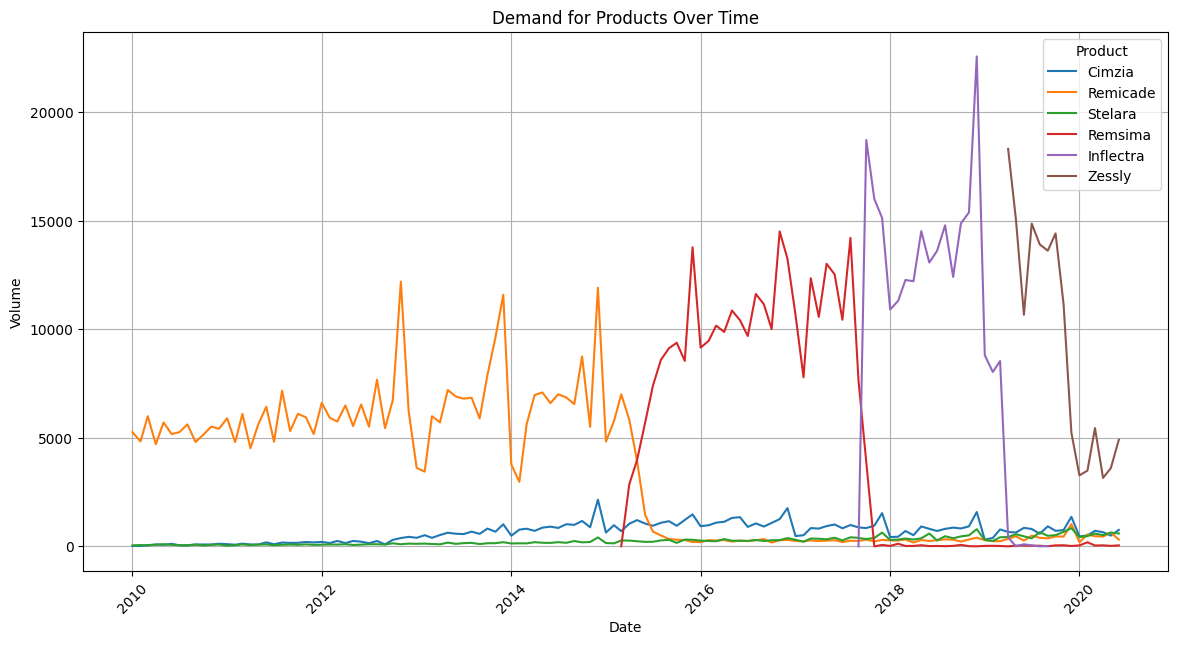

In [1686]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='Date', y='Volume', hue='Product')
plt.title('Demand for Products Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

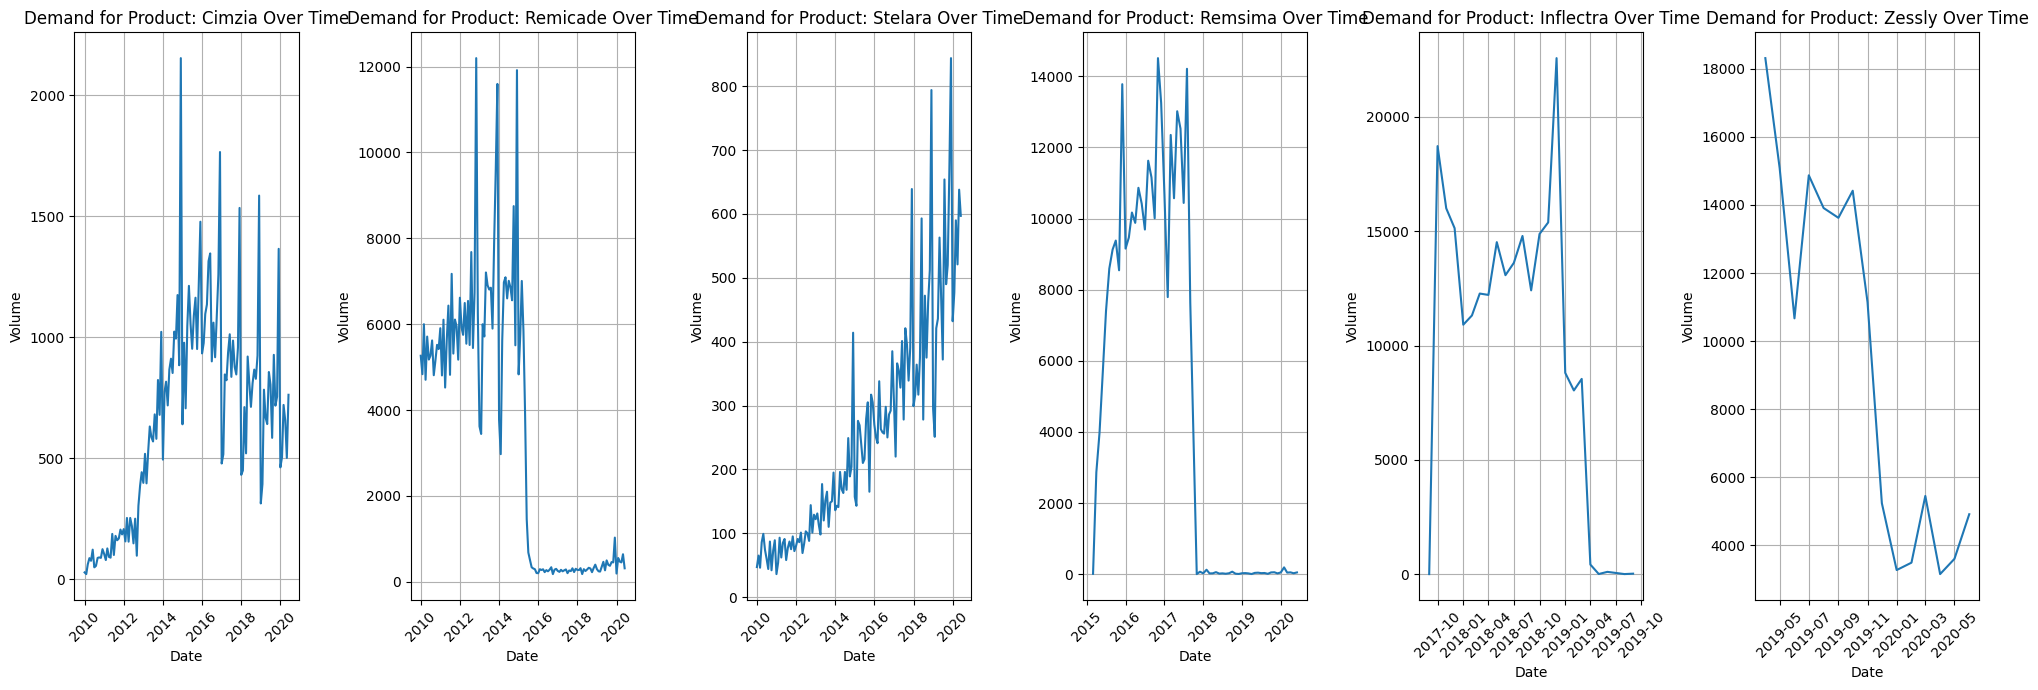

In [1687]:
# Get the unique substances in your DataFrame
substances = cleaned_hosp_sales_size['Product'].unique()

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, len(substances), figsize=(20, 7))

# Loop through each substance and corresponding axis
for i, substance in enumerate(substances):
    
    # Filter data for the current substance
    df_substance = df_grouped[df_grouped['Product'] == substance]
    
    # Plot the data for the current substance on the corresponding axis
    sns.lineplot(data=df_substance, x='Date', y='Volume', ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Demand for Product: {substance} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volume')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()